In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Engineering The First Feature 

The first feature is Average Pixel Used to draw the number in the image. The algorithm below iterates through every row in the data set and sums up all the row's
pixels(collumns) which have a value bigger than 0 (val[col].unique() > 0) and after that devides the sum by the total number of pixels (784)

In [5]:
def avg_pix_usd(data, col_name, start_col, end_col):
    
    data[col_name] = np.nan
    
    for i in range(len(data)):

        val = data.iloc[[i], start_col:end_col]
        counter = 0

        for col in val.columns:

            if val[col].unique() > 0:

                counter += 1

        data.loc[[i], col_name] = counter/784

In [6]:
avg_pix_usd(train, 'avg_pixel_used', 1, -1)
avg_pix_usd(test, 'avg_pixel_used', 0, -1)

### Engineering The Second Feature 

The second feature is Maximum Pixel Value. Firstly, the algorithm below iterates through every row in the data set and reshapes it into a 28x28 grayscaled image and scales all the pixels to be between 0 and 1 (pixel/255.0). Secondly, it divides the image into 4 sub images and takes the average pixel value for each sub image. Lastly, the maximum pixel value is chosen (like pooling in CNN)

In [7]:
def max_val(data, col_name, start_col, end_col):
    
    data[col_name] = np.nan
    
    img = data.iloc[:, start_col:end_col].values.reshape(-1, 28, 28, 1)/255.0
    
    for i in range(len(img)):
        
        sub_img1 = np.average(img[i][:14,:14,0])
        sub_img2 = np.average(img[i][14:,:14,0])
        sub_img3 = np.average(img[i][:14,14:,0])
        sub_img4 = np.average(img[i][14:,14:,0])

        maximum = np.max([sub_img1,sub_img2,sub_img3,sub_img4])

        data.loc[[i], col_name] = maximum

In [8]:
max_val(train, 'max_pixel_val', 1, -2)
max_val(test, 'max_pixel_val', 0, -2)

### Engineering The Third Feature 

The third feature is Average Pixel Value of the whole image. The algorithm below reshapes each row into a 28x28 pixel grayscale image and then iterates through each image in the data set and takes the average pixel value of that image and adds it to the new column.

In [9]:
def avg_pixVal(data, col_name, start_col, end_col):
    
    data[col_name] = np.nan
    
    images = data.iloc[:, start_col:end_col].values.reshape(-1,28,28,1)/255.0
    
    for i in range(len(data)):
        
        data.loc[[i], col_name] = np.average(images[i][:,:,0])

In [10]:
avg_pixVal(train, 'avg_pixel_val', 1, -3)
avg_pixVal(test, 'avg_pixel_val', 0, -3)

## Train Test Split

In [11]:
'''
setting ['label'] to categorical data type
'''
train['label'] = train['label'].astype('category', copy=False)

In [12]:
'''
Creating X and y variables of the training data set and another variable for the testing data set
for future machine learning manipulations (scaling, dimension reduction, splitting to train & val sets)
'''
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, [0]].values
X_test = test.iloc[:,:].values

In [13]:
'''
feature scaling
'''
X_train[:, :-3] = X_train[:, :-3]/255.0
X_test[:, :-3] = X_test[:, :-3]/255.0

### Principal Component Analysis (PCA)

In [15]:
from sklearn.decomposition import PCA
'''
creating a PCA object with 35 components and applying it on the 784 pixel features
'''
pca = PCA(n_components=45)
train_components = pca.fit_transform(X_train[:, :-3])

Text(0.5, 1.0, 'Explained Varience by each PCA component')

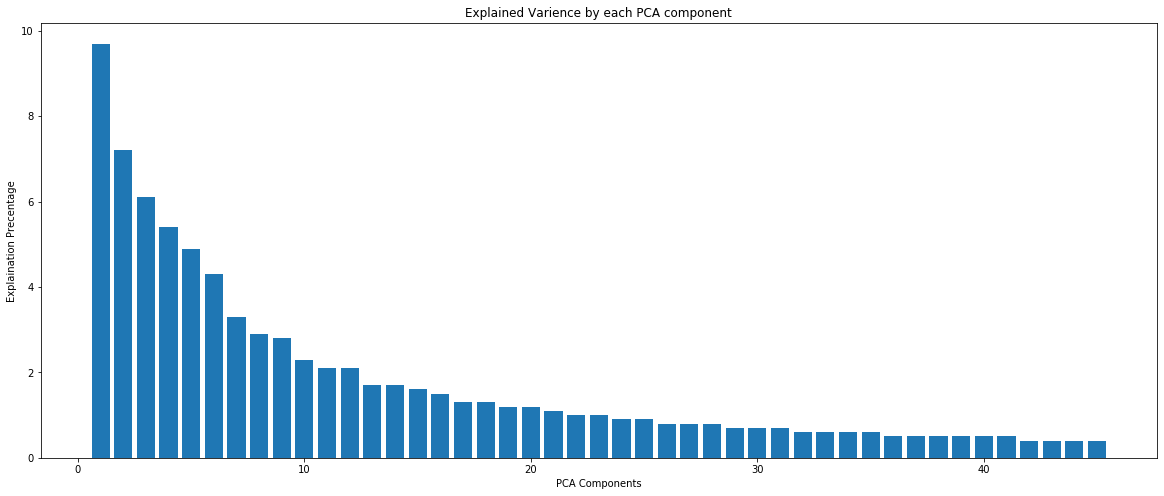

In [16]:
'''
creating a barplot 
'''
plt.figure(figsize=(20,8))
plt.bar(x=range(1, len(np.round(pca.explained_variance_ratio_*100, decimals=1))+1), 
                height=(np.round(pca.explained_variance_ratio_*100, decimals=1)))
plt.ylabel('Explaination Precentage')
plt.xlabel('PCA Components')
plt.title('Explained Varience by each PCA component')

In [17]:
print('Total Explained Variance: ' + str(int(np.round(pca.explained_variance_ratio_*100, decimals=1).sum())) +'%') 

Total Explained Variance: 81%


In [18]:
X_train = pd.DataFrame(X_train)

In [19]:
'''
creating a column for each pca component
'''
for x in range(train_components.shape[1]):
    X_train['PCA'+str(x)] = train_components[:, [x]]

In [20]:
'''
removing all the pixels features from pixel0 - pixel784
'''
X_train.drop(X_train.columns[:784], axis=1, inplace=True)
X_train.head()

,784,785,786,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,...,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44
0,0.123724,0.156723,0.083278,-2.594493,-2.742397,0.718753,0.472986,-0.317968,1.919458,-2.680278,...,-0.574881,-0.195076,-0.344949,-0.630471,-0.555041,0.410430,0.084558,0.165698,-0.143769,-0.825451
1,0.312500,0.232733,0.223134,6.672360,-1.413928,-1.967865,1.315387,-1.734819,2.895702,2.564217,...,-0.361875,-0.434004,-0.158394,0.433265,0.345804,0.058265,0.008193,0.071896,-0.155153,-0.426299
2,0.100765,0.085214,0.067152,-3.478017,-1.152023,0.263354,0.306917,-1.857709,-1.268787,1.716859,...,-0.008722,-0.201768,0.259611,-0.449965,-0.153677,0.631336,0.123514,0.321265,0.444107,0.098846
3,0.144133,0.117827,0.075155,-0.650022,1.177187,-0.251551,2.979240,-1.669978,0.617217,-1.192546,...,0.445956,-0.260609,0.295851,0.106810,0.454907,-0.248561,0.563595,0.230922,0.609480,0.733857
4,0.331633,0.270008,0.255567,7.543960,-1.761385,-2.151424,0.739432,-2.555829,3.882603,2.213753,...,0.270886,-0.311951,0.152621,-0.063995,-0.347522,0.489444,-0.312644,0.208745,-0.154309,-0.435260


### Applying PCA on the validation set (testing set) 

In [22]:
components_test = pca.transform(X_test[:, :-3])

In [25]:
X_test = pd.DataFrame(X_test)

In [26]:
for x in range(components_test.shape[1]):
    X_test['PCA'+str(x)] = components_test[:, [x]]

In [27]:
X_test.drop(X_test.columns[:784], axis=1, inplace=True)
X_test.head()

,784,785,786,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,...,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44
0,0.274235,0.264686,0.197099,3.321905,-0.469320,3.130704,2.453068,1.200527,2.074095,0.734646,...,0.452134,0.388979,-0.071452,-0.278069,-0.296614,-0.252046,-0.615836,-1.057533,0.442772,0.267348
1,0.271684,0.210064,0.199745,4.526474,-0.079278,0.714247,-0.444609,-3.784402,1.718836,2.816532,...,0.277061,1.467692,-0.324846,-0.187156,-0.762369,0.015473,-0.132409,0.449669,-0.176681,-0.215351
2,0.150510,0.096238,0.074380,-1.987530,0.353871,0.638776,-0.353118,-0.663003,0.496068,-1.327121,...,0.800557,0.800044,0.285153,0.168419,0.244135,0.139929,-0.752882,0.285487,0.514651,0.286193
3,0.139031,0.104982,0.081072,-1.049403,2.295729,1.878013,1.527023,-0.959065,0.678180,-0.359995,...,0.228227,-0.480702,0.309955,-0.130056,-0.181018,0.324214,0.242864,0.256039,0.409292,-0.499608
4,0.191327,0.170768,0.121519,-0.383460,-2.784483,0.083461,0.599473,1.091400,0.200530,0.181800,...,0.138179,-0.186770,0.804385,0.007169,-0.713432,0.033148,0.716542,-0.227608,0.491441,0.507027


In [28]:
y_train = pd.DataFrame(y_train)

In [29]:
X_train.to_csv('New_train.csv', index=False)
X_test.to_csv('New_test.csv', index=False)
y_train.to_csv('New_train_label.csv', index=False)